# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Binarizer, KBinsDiscretizer


import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import f1_score

from warnings import filterwarnings
import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')


import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

# 데이터 로딩

In [2]:
# data
data = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/train.csv') # index_col = 0

# target
target = data.iloc[:, -1].to_numpy()

# test
test = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/test.csv')   # index_col = 0

In [3]:
test

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


# 데이터 탐색

In [4]:
# data
data["YEAR"].value_counts(0)

2008    1419
2014    1400
2013    1189
2015    1156
2011    1146
2012    1073
2009     949
2016     942
2017     896
2018     878
2010     866
2019     649
2021     477
2020     373
2022     354
2007     328
Name: YEAR, dtype: int64

In [5]:
# 결측값 확인
data.isna().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [6]:
# 상관 계수
# data.corrwith(data[:,-1])

In [7]:
pd.DataFrame(target).value_counts()

0    12892
1     1203
dtype: int64

# 데이터 전처리 数据预处理

## OnehotEncoding

In [8]:
data2 = data.iloc[:, 1].copy()

In [9]:
data2.value_counts()

COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

In [10]:
# OneHotEncoder

x = data2.to_numpy()
x= x.reshape(-1, 1)

ohe = OneHotEncoder()
result = ohe.fit_transform(x).toarray()

name = ohe.get_feature_names()
result

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [11]:
name

array(['x0_COMPONENT1', 'x0_COMPONENT2', 'x0_COMPONENT3', 'x0_COMPONENT4'],
      dtype=object)

In [12]:
# 합치기 준비
ohe_df = pd.DataFrame(result, columns = name)
ohe_df.head()

,x0_COMPONENT1,x0_COMPONENT2,x0_COMPONENT3,x0_COMPONENT4
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


## StandardScaler

In [13]:
name1 = ['ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']


test = test[name1]
test

,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [14]:
test_stage_features = ['ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

data = data[test_stage_features]

# 'COMPONENT_ARBITRARY', 'ANONYMOUS_1'
data.isna().sum()

ANONYMOUS_2    0
AG             0
CO             0
CR             0
CU             0
FE             0
H2O            0
MN             0
MO             0
NI             0
PQINDEX        0
TI             0
V              0
V40            0
ZN             0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(data)

In [16]:
scaled

array([[-0.3407601 , -0.15021362, -0.08963275, ..., -0.1065502 ,
         0.89989172, -0.96600175],
       [-0.0225763 , -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.31737552,  0.11914661],
       [-0.3407601 , -0.15021362, -0.08963275, ..., -0.1065502 ,
        -0.74088603, -0.33221493],
       ...,
       [ 0.29560751, -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.11580577,  1.33970343],
       [ 0.29560751, -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.31132842,  0.11914661],
       [-0.3407601 , -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.25690459,  0.04391969]])

In [17]:
data_df = pd.DataFrame(scaled, columns = test_stage_features)

In [18]:
data_df.head()

,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215
3,-0.340760,-0.150214,-0.089633,-0.115388,-0.260252,-0.264764,-0.041588,-0.160621,-0.400998,-0.191804,-0.242884,-0.102635,-0.10655,0.482642,-1.093888
4,-0.340760,-0.150214,-0.089633,-0.115388,-0.268007,-0.200996,-0.041588,-0.250456,-0.400998,-0.191804,-0.129674,-0.102635,-0.10655,0.478611,-0.866326


## Scaled Data 합치기

In [19]:
# 합치기
data = pd.concat([ohe_df, data_df], axis=1)

In [20]:
data['label'] = target

In [21]:
data.head()

,x0_COMPONENT1,x0_COMPONENT2,x0_COMPONENT3,x0_COMPONENT4,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,label
0,0.0,0.0,1.0,0.0,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002,0
1,0.0,1.0,0.0,0.0,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147,0
2,0.0,1.0,0.0,0.0,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215,1
3,0.0,0.0,1.0,0.0,-0.340760,-0.150214,-0.089633,-0.115388,-0.260252,-0.264764,-0.041588,-0.160621,-0.400998,-0.191804,-0.242884,-0.102635,-0.10655,0.482642,-1.093888,0
4,0.0,0.0,1.0,0.0,-0.340760,-0.150214,-0.089633,-0.115388,-0.268007,-0.200996,-0.041588,-0.250456,-0.400998,-0.191804,-0.129674,-0.102635,-0.10655,0.478611,-0.866326,0


## 이상치 처리

findfont: Font family ['malgun ghthic'] not found. Falling back to DejaVu Sans.


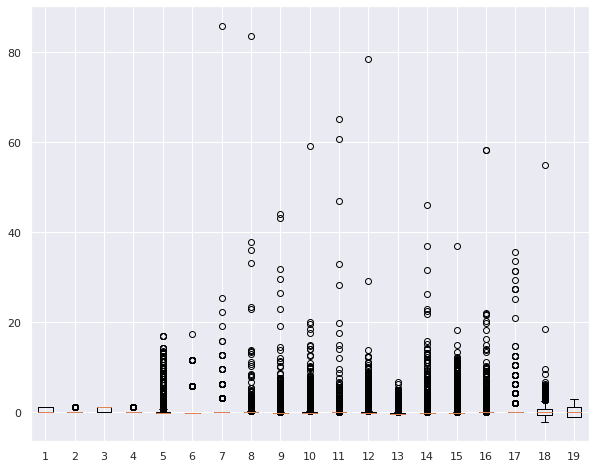

In [22]:
plt.boxplot(data.iloc[:, :-1])
plt.show()

<AxesSubplot:>

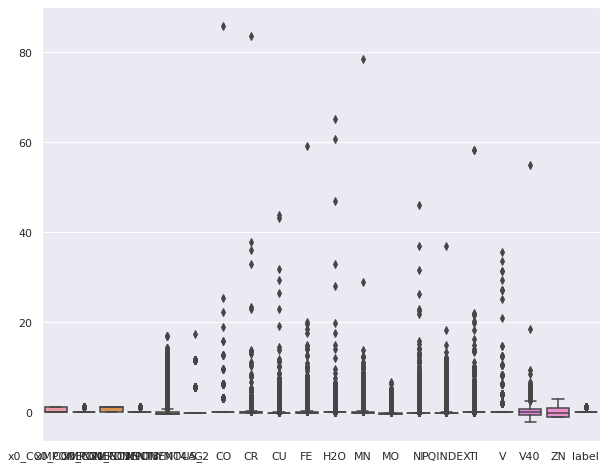

In [23]:
sns.boxplot(data=data, dodge=False)

# 데이터 분리

In [24]:
data = data.iloc[:, :-1].to_numpy()

In [25]:
data.shape

(14095, 19)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                   test_size=0.2, stratify = target, random_state=2022)

# 분류
 - 로지스틱 회귀나 분류 알고리즘 이용하여 모델 생성
 - 점수확인 

## 로지스틱

In [66]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
lr.predict_proba(X_test)

array([[0.90642782, 0.09357218],
       [0.90465545, 0.09534455],
       [0.91871374, 0.08128626],
       ...,
       [0.90384331, 0.09615669],
       [0.90813399, 0.09186601],
       [0.91571629, 0.08428371]])

In [68]:
#   기울기     와     절편
print(lr.coef_, lr.intercept_)

[[ 0.08448768  0.20075266 -0.03992452 -0.24719566 -0.2533975   0.05512521
  -0.09713094 -0.00537291  0.02912717  0.14298864 -0.11054124 -0.04086505
   0.04739263  0.03501244  0.0108469   0.00775222  0.02073911  0.09065892
  -0.06297534]] [-2.43179832]


In [69]:
# z값 계산
decisions = lr.decision_function(X_test)
decisions

array([-2.27077832, -2.25005698, -2.42499758, ..., -2.24067696,
       -2.29106079, -2.38551796])

In [70]:
from scipy.special import expit

print(expit(decisions))
print(1 - expit(decisions))


[0.09357218 0.09534455 0.08128626 ... 0.09615669 0.09186601 0.08428371]
[0.90642782 0.90465545 0.91871374 ... 0.90384331 0.90813399 0.91571629]


In [71]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print('Macro f1 socre : ', f1_score(y_test, pred, labels=[0,1], average='macro'))

0.9145973749556581
0.914153955303299
Macro f1 socre :  0.47757598220904374


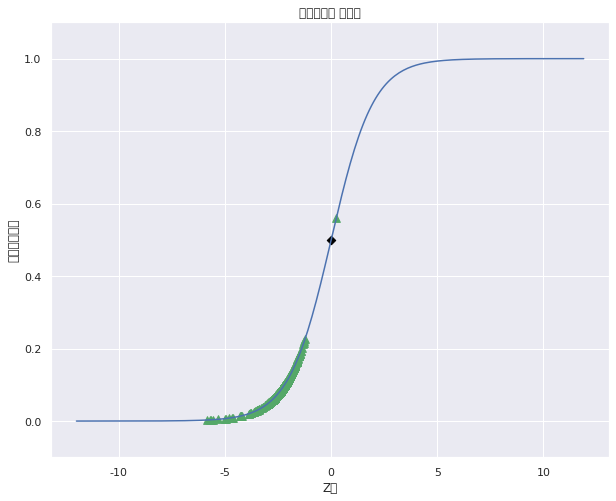

In [72]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

train = np.arange(-12, 12, 0.1)
result = sigmoid(train)

plt.plot(train, result)
plt.scatter(decisions, expit(decisions),marker='^' ,color = 'g', s=60)
plt.scatter(0, 0.5, marker = 'D', color = 'black')

plt.title('시그모이드 시각화')
plt.xlabel('Z값')
plt.ylabel('시그모이드값')
plt.ylim(-0.1, 1.1)
plt.show()

## RandomForest

In [73]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_jobs=-1, random_state = 2022)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=2022)

In [74]:
rf_pred = rf.predict(X_test)

In [75]:
print('Macro f1 socre : ', f1_score(y_test, rf_pred, labels=[0,1], average='macro'))

Macro f1 socre :  0.4900865445380822


In [76]:
# pd.DataFrame(X_train)

# 그리드서치

In [77]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xg = XGBClassifier()
xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32],
                'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

grid_search_xg = GridSearchCV( estimator = xg, param_grid = xg_parameters, scoring = 'f1_macro', cv = 10,n_jobs=1 )
grid_search_xg.fit(X_train, y_train )
best_xg = grid_search_xg.best_estimator_
best_xg



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=12, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=99, ...)

## Xgboost

### HyperOpt

In [80]:
!pip install hyperopt

In [82]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train, random_state=2022)

from hyperopt import hp

xgb_search_space = {'max_depth' : hp.quniform('max_depth',5,20,1),
                   'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                   'colsample_bytree':hp.uniform('colsample_bytree',0.5,1),}

In [83]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    return {'loss':(-1) * np.mean(accuracy), 'status':STATUS_OK}

In [84]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()  ## 결과 저장

best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trial_val,
            rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [01:26<00:00,  1.74s/trial, best loss: -0.9148634490043953]
best: {'colsample_bytree': 0.7316517614434123, 'learning_rate': 0.02057390828839449, 'max_depth': 12.0, 'min_child_weight': 2.0}


In [85]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.73165, learning_rate:0.02057, max_depth:12, min_child_weight:2


In [86]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.
          format(accuracy, precision, recall, f1, roc_auc))

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

In [64]:
xgb_wrapper = XGBClassifier(
    n_estimators=400,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

evals = [(X_tr, y_tr), (X_val, y_val)]

xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', 
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.64259	validation_1-logloss:0.64153
[1]	validation_0-logloss:0.59903	validation_1-logloss:0.59706
[2]	validation_0-logloss:0.56126	validation_1-logloss:0.55845
[3]	validation_0-logloss:0.52835	validation_1-logloss:0.52508
[4]	validation_0-logloss:0.49933	validation_1-logloss:0.49620
[5]	validation_0-logloss:0.47387	validation_1-logloss:0.47034
[6]	validation_0-logloss:0.45157	validation_1-logloss:0.44775
[7]	validation_0-logloss:0.43184	validation_1-logloss:0.42778
[8]	validation_0-logloss:0.41417	validation_1-logloss:0.40986
[9]	validation_0-logloss:0.39862	validation_1-logloss:0.39443
[10]	validation_0-logloss:0.38481	validation_1-logloss:0.38072
[11]	validation_0-logloss:0.37209	validation_1-logloss:0.36841
[12]	validation_0-logloss:0.36081	validation_1-logloss:0.35737
[13]	validation_0-logloss:0.35056	validation_1-logloss:0.34729
[14]	validation_0-logloss:0.34161	validation_1-logloss:0.33874
[15]	validation_0-logloss:0.33364	validation_1-logloss:0.33079
[1

[130]	validation_0-logloss:0.22968	validation_1-logloss:0.26872
오차 행렬
[[2575    0]
 [ 243    1]]
정확도 : 0.9138, 정밀도 : 1.0000, 재현율 : 0.0041, F1 : 0.0082, AUC : 0.5987


In [57]:
import xgboost as xgb

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2022)
# 90%  10%


dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)


params = {'max_depth': [3,4,5,6,7],  # 트기 최대 깊이 (3~10)
          'eta': 0.05,     # 학습률 XGBClassifier인경우 learning_rate 사용해야함
          'objective' : 'binary:logistic', # 0, 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(vinary:logistic)
          'eval_metric' : 'logloss'}  # 회귀

num_rounds = 400

In [58]:
# 학습
# xgboost 모듈의 train()함수에 파라미터로 전달
# 학습 데이터 셋은 'train' 또는 평가 데이터셋은 'eval'로 명가한다

eval_list = [(dtr,'train'),(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round = num_rounds, early_stopping_rounds=100, evals=eval_list)
#                                        훈련             반복회수                    조기 중단:(최소50부터)       

XGBoostError: Invalid Parameter format for max_depth expect int but value='[3, 4, 5, 6, 7]'

In [ ]:
xgb_pred = xgb_model.predict(dtest)

In [ ]:
preds = [1 if x > 0.5 else 0 for x in xgb_pred]
print('예측값 10개만 표시 : ', preds[:10])

In [ ]:
print('Macro f1 socre : ', f1_score(y_test, preds, average='macro'))